<a href="https://colab.research.google.com/github/proyectoTFMUAH/ANN/blob/main/ANN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#chuleta

#https://www.datacamp.com/community/tutorials/deep-learning-python?utm_campaignid=282657555&utm_adgroupid=1147890695096458&utm_device=c&utm_keyword=keras&utm_matchtype=p&utm_network=o&utm_adpostion=&utm_creative=&utm_targetid=kwd-71743615746804:loc-170&utm_loc_interest_ms=&utm_loc_physical_ms=3203&msclkid=38ccf3d9b04f1045ba9093f9f9c73036&utm_source=bing&utm_medium=cpc&utm_campaign=NEW%20Granular%20Topics%20(via%20DSA%20insights)%20%7C%20Tier%201%20BING&utm_term=keras&utm_content=community%2Ftutorials%2Fdeep-learning-python


#Cargamos la libreria

import tensorflow as tf

import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#Cargamos el Dataset
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()








Saving DSEuropea.csv to DSEuropea.csv


In [34]:
#hacemos prueba para predecir

from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

prueba1 = pd.read_csv('prueba1.csv')

prueba1.head()

test = prueba1.copy()

print(test)
testresult = test.pop("result")
testindex= test.pop('id')

test = np.array(test)

print(test.shape)

Saving prueba1.csv to prueba1 (9).csv
                                    "id","vSt","vK","vTmat","vvol","vr","result"
1 42.001 40.001 10.001 0.201 0.011                                         12.86


KeyError: ignored

In [2]:
# https://www.tensorflow.org/tutorials/load_data/csv

Pricing_train = pd.read_csv('DSEuropea.csv')

Pricing_train.head()

,Unnamed: 0,vSt,vK,vTmat,vvol,vr,Unnamed: 6
0,1,79.707505,8.871211,40.762914,0.501901,0.009355,77.778414
1,2,83.910772,79.908747,88.187244,0.829983,0.030904,83.908845
2,3,85.718872,32.073058,54.071332,0.178755,0.035071,81.016948
3,4,65.933670,83.108253,19.654488,0.761082,0.097681,63.553231
4,5,39.125489,44.943978,43.157735,0.242775,0.073016,37.325098


In [19]:
#La tarea nominal de este conjunto de datos es predecir el precio, así que separe las características y etiquetas para el entrenamiento:
Pricing_train_features = Pricing_train.copy()
Pricing_train_results = Pricing_train_features.pop('Unnamed: 6')
Pricing_indices = Pricing_train_features.pop('Unnamed: 0')

Pricing_train_results
Pricing_train_features
#Pricing_train_exclude_results
# Empaque las funciones en una sola matriz NumPy .:

Pricing_train_features = np.array(Pricing_train_features)
Pricing_train_features

print(Pricing_train_features.shape)


(1000, 5)


Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 5312.0448 - accuracy: 0.0031 
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 3503.0970 - accuracy: 0.0032
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 2177.5608 - accuracy: 0.0000e+00
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 1339.1834 - accuracy: 0.0000e+00
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 774.6218 - accuracy: 0.0000e+00
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 413.2756 - accuracy: 0.0000e+00
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 229.7420 - accuracy: 0.0000e+00
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 150.6241 - accuracy: 0.0000e+00
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 114.9747 - accuracy: 0.0000e+00
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - 

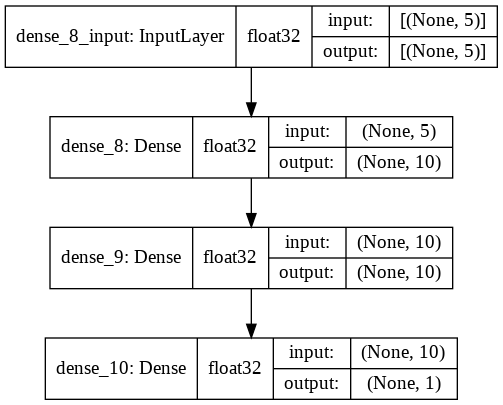

In [39]:

#Sequential

#https://keras.io/guides/sequential_model/
from tensorflow import keras


#define el modelo
modelEuropeanoption = tf.keras.Sequential([
  layers.Dense(10,activation='relu'),
  layers.Dense(10,activation='relu'),
  layers.Dense(1)
])
#compilar modelo
modelEuropeanoption.compile(loss = tf.losses.MeanSquaredError(),
                              metrics=['accuracy'],
                      optimizer = tf.optimizers.Adam())

# entrernar el modelo

modelEuropeanoption.fit(Pricing_train_features, Pricing_train_results, epochs=10)

modelEuropeanoption.summary()

len(modelEuropeanoption.weights)

keras.utils.plot_model(modelEuropeanoption, show_shapes=True,show_dtype=True)



In [40]:
#SAlvar el modleo y predicifr

#https://www.machinecurve.com/index.php/2020/02/14/how-to-save-and-load-a-model-with-keras/#predictions-for-new-data

#https://victorzhou.com/blog/keras-cnn-tutorial/

a=np.array([42.001,40.001,10.001,0.201,0.011])

print(a.shape)
a.reshape((1,5))
print(a.shape)

b=np.array([79.708,8.871,40.763,0.502, 0.009])



prediction = modelEuropeanoption.predict(Pricing_train_features)


# show the inputs and predicted outputs
for i in range(len(Pricing_train_features)):
	print("X=%s, Predicted=%s" % (Pricing_train_features[i], prediction[i]))





(5,)
(5,)
X=[79.708  8.871 40.763  0.502  0.009], Predicted=[78.355]
X=[83.911 79.909 88.187  0.83   0.031], Predicted=[71.739]
X=[85.719 32.073 54.071  0.179  0.035], Predicted=[80.683]
X=[65.934 83.108 19.654  0.761  0.098], Predicted=[52.192]
X=[39.125 44.944 43.158  0.243  0.073], Predicted=[29.953]
X=[36.663 75.971  5.649  0.905  0.092], Predicted=[26.163]
X=[57.738 86.525 18.423  0.217  0.036], Predicted=[43.872]
X=[73.634 16.707 13.507  0.891  0.031], Predicted=[71.675]
X=[19.364 92.082 20.675  0.761  0.04 ], Predicted=[15.445]
X=[ 5.805 88.533 10.896  0.133  0.016], Predicted=[7.181]
X=[ 25.906   1.104 111.778   0.197   0.055], Predicted=[43.65]
X=[31.442 31.918 90.223  0.108  0.02 ], Predicted=[35.342]
X=[43.668 26.591 43.48   0.604  0.091], Predicted=[42.032]
X=[ 49.876  53.128 103.626   0.029   0.052], Predicted=[47.764]
X=[75.048 87.508 51.745  0.634  0.098], Predicted=[59.908]
X=[85.094  4.76  30.624  0.4    0.056], Predicted=[83.945]
X=[76.479 44.213  4.643  0.268  0.06 ]